<a href="https://colab.research.google.com/github/amirmohammadkalateh/Learning_rate_schedule/blob/main/performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

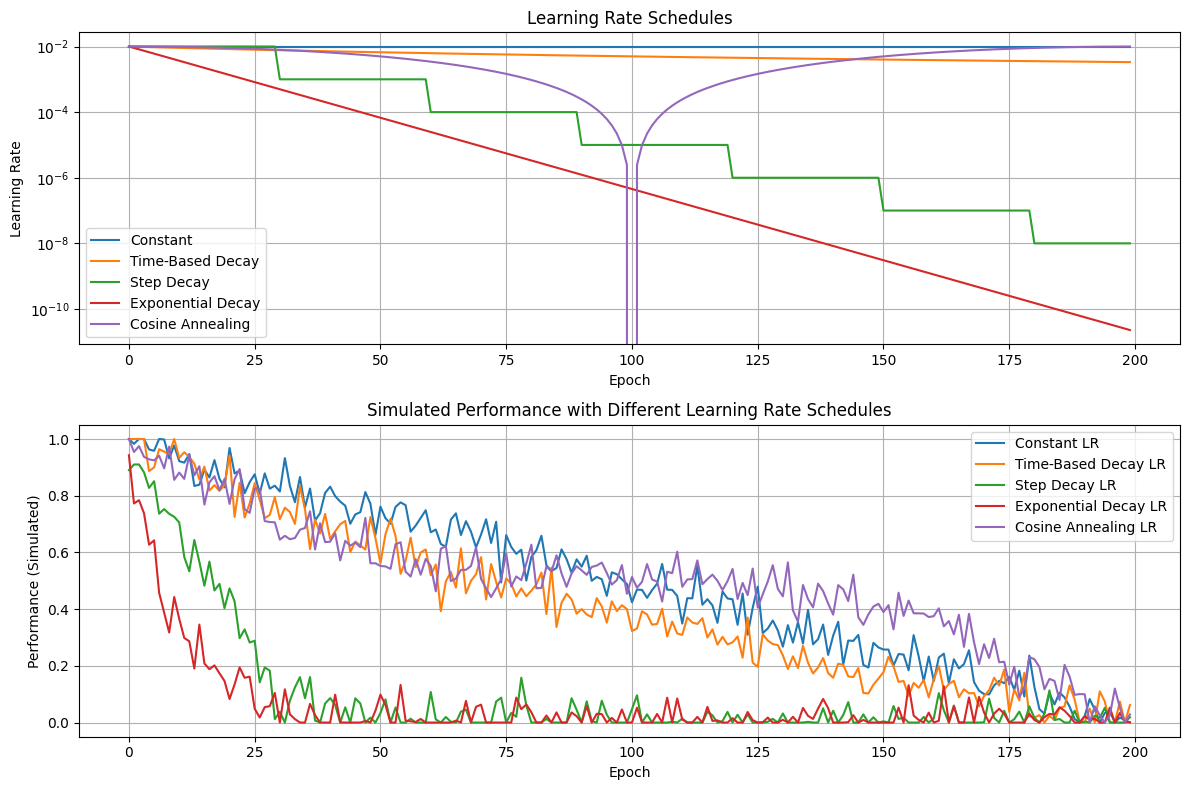

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define different learning rate schedules

def constant_lr(epochs, initial_lr):
    """Constant learning rate."""
    return np.full(epochs, initial_lr)

def time_based_decay(epochs, initial_lr, decay_rate=0.01):
    """Time-based decay: lr = initial_lr / (1 + decay_rate * epoch)"""
    return initial_lr / (1 + decay_rate * np.arange(epochs))

def step_decay(epochs, initial_lr, step_size=30, gamma=0.1):
    """Step decay: lr drops by gamma every step_size epochs."""
    lr = initial_lr * (gamma ** (np.floor(np.arange(epochs) / step_size)))
    return lr

def exponential_decay(epochs, initial_lr, decay_rate=0.1):
    """Exponential decay: lr = initial_lr * exp(-decay_rate * epoch)"""
    return initial_lr * np.exp(-decay_rate * np.arange(epochs))

def cosine_annealing(epochs, initial_lr, T_max=100, eta_min=0):
    """Cosine annealing schedule."""
    t = np.arange(epochs)
    lr = eta_min + (initial_lr - eta_min) * (1 + np.cos(np.pi * t / T_max)) / 2
    return lr

# Set parameters for the visualization
epochs = 200
initial_learning_rate = 0.01

# Generate learning rate schedules
lr_constant = constant_lr(epochs, initial_learning_rate)
lr_time_based = time_based_decay(epochs, initial_learning_rate)
lr_step = step_decay(epochs, initial_learning_rate)
lr_exponential = exponential_decay(epochs, initial_learning_rate)
lr_cosine = cosine_annealing(epochs, initial_learning_rate, T_max=epochs // 2) # Adjust T_max

# --- Simulate Performance (Illustrative - Replace with actual training data) ---
# In a real scenario, you would record the loss or accuracy at each epoch
# while using a specific learning rate schedule. Here, we'll create
# some artificial performance trends to show how learning rate might affect it.

np.random.seed(42) # for reproducibility

def simulate_performance(lr_schedule, noise_level=0.05):
    """Simulates performance (e.g., negative loss) based on the LR schedule."""
    performance = 1 - np.cumsum(lr_schedule) / np.sum(lr_schedule) + np.random.normal(0, noise_level, len(lr_schedule))
    return np.clip(performance, 0, 1) # Ensure performance stays within [0, 1]

performance_constant = simulate_performance(lr_constant * 10) # Scale LR for more visible effect
performance_time_based = simulate_performance(lr_time_based * 20)
performance_step = simulate_performance(lr_step * 30)
performance_exponential = simulate_performance(lr_exponential * 40)
performance_cosine = simulate_performance(lr_cosine * 20)

# --- Plotting ---
plt.figure(figsize=(12, 8))

# Plot Learning Rate Schedules
plt.subplot(2, 1, 1)
plt.plot(range(epochs), lr_constant, label='Constant')
plt.plot(range(epochs), lr_time_based, label='Time-Based Decay')
plt.plot(range(epochs), lr_step, label='Step Decay')
plt.plot(range(epochs), lr_exponential, label='Exponential Decay')
plt.plot(range(epochs), lr_cosine, label='Cosine Annealing')
plt.title('Learning Rate Schedules')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.yscale('log') # Use a logarithmic scale for better visualization
plt.grid(True)
plt.legend()

# Plot Simulated Performance
plt.subplot(2, 1, 2)
plt.plot(range(epochs), performance_constant, label='Constant LR')
plt.plot(range(epochs), performance_time_based, label='Time-Based Decay LR')
plt.plot(range(epochs), performance_step, label='Step Decay LR')
plt.plot(range(epochs), performance_exponential, label='Exponential Decay LR')
plt.plot(range(epochs), performance_cosine, label='Cosine Annealing LR')
plt.title('Simulated Performance with Different Learning Rate Schedules')
plt.xlabel('Epoch')
plt.ylabel('Performance (Simulated)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

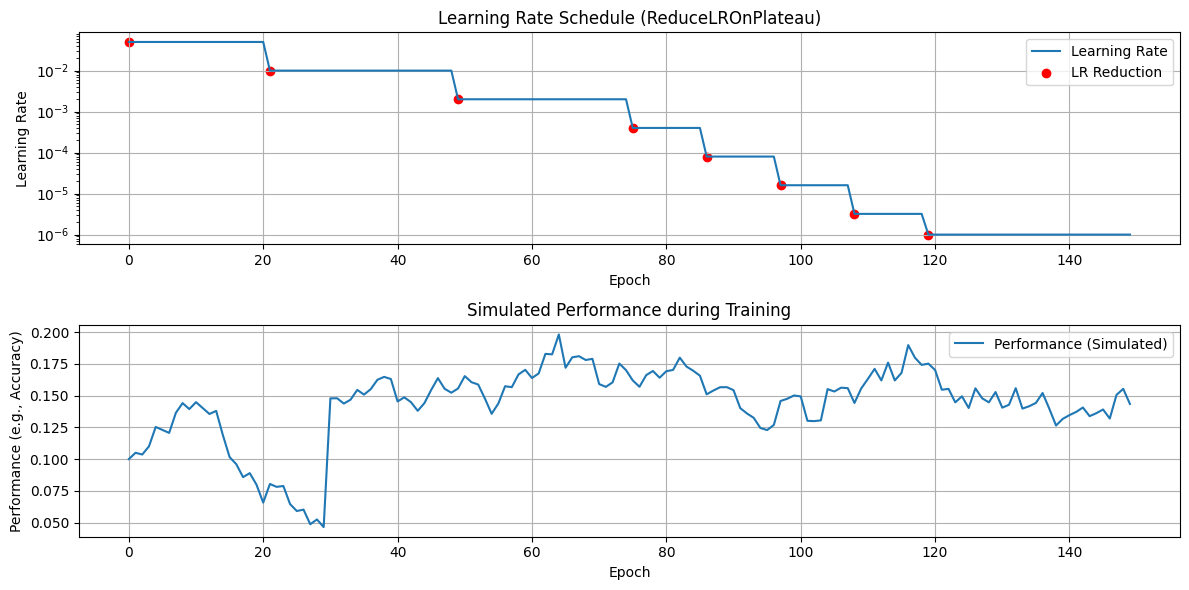

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate training history with learning rate changes on plateau

def simulate_training_with_lr_plateau(epochs=100, initial_lr=0.01, patience=10, factor=0.5, min_lr=1e-5):
    """
    Simulates training and learning rate reduction on plateau.

    Args:
        epochs (int): Total number of epochs.
        initial_lr (float): Initial learning rate.
        patience (int): Number of epochs with no improvement after which learning rate will be reduced.
        factor (float): Factor by which the learning rate will be reduced. new_lr = lr * factor.
        min_lr (float): Lower bound for the learning rate.

    Returns:
        tuple: A tuple containing lists of epochs, learning rates, and simulated performance.
    """
    epochs_list = list(range(epochs))
    learning_rates = [initial_lr] * epochs
    performance = [0.1]  # Initial performance

    best_performance = 0.1
    epochs_since_improvement = 0
    current_lr = initial_lr

    np.random.seed(42) # for reproducibility

    for epoch in range(1, epochs):
        # Simulate performance change (could be loss decreasing or accuracy increasing)
        improvement = np.random.normal(0, 0.01)
        current_performance = performance[-1] + improvement

        # Introduce a plateau around epoch 30-40
        if 30 <= epoch < 40:
            current_performance = best_performance - np.random.normal(0, 0.005) # Slight decrease/fluctuation

        performance.append(max(0, min(1, current_performance))) # Clip performance to [0, 1]

        if performance[-1] > best_performance + 1e-4: # Consider a small tolerance
            best_performance = performance[-1]
            epochs_since_improvement = 0
        else:
            epochs_since_improvement += 1

        if epochs_since_improvement > patience and current_lr > min_lr:
            current_lr *= factor
            current_lr = max(current_lr, min_lr)
            for i in range(epoch, epochs):
                learning_rates[i] = current_lr
            epochs_since_improvement = 0 # Reset counter after reduction

        learning_rates[epoch] = current_lr

    return epochs_list, learning_rates, performance

# Simulate the training process
epochs, learning_rates, performance = simulate_training_with_lr_plateau(
    epochs=150, initial_lr=0.05, patience=10, factor=0.2, min_lr=1e-6
)

# Find the epochs where the learning rate was reduced
lr_change_epochs = [0] + [i for i in range(1, len(learning_rates)) if learning_rates[i] != learning_rates[i-1]]
lr_change_values = [learning_rates[i] for i in lr_change_epochs]

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot Learning Rate Schedule
plt.subplot(2, 1, 1)
plt.plot(epochs, learning_rates, label='Learning Rate')
plt.scatter(lr_change_epochs, lr_change_values, color='red', marker='o', label='LR Reduction')
plt.title('Learning Rate Schedule (ReduceLROnPlateau)')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Plot Simulated Performance
plt.subplot(2, 1, 2)
plt.plot(epochs, performance, label='Performance (Simulated)')
plt.title('Simulated Performance during Training')
plt.xlabel('Epoch')
plt.ylabel('Performance (e.g., Accuracy)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 28: ReduceLROnPlateau reducing learning rate to 0.05000000074505806.

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.02500000037252903.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.012500000186264515.

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0062500000931322575.


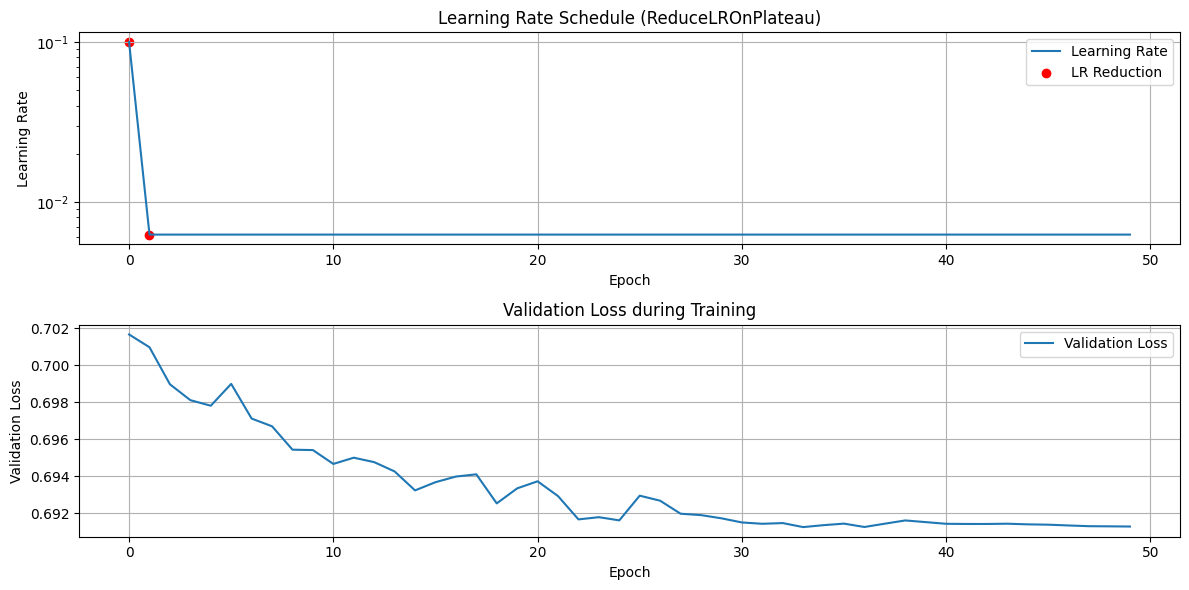

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define a simple ANN model
def create_model(input_dim):
    model = keras.Sequential([
        Dense(10, activation='relu', input_dim=input_dim),
        Dense(1, activation='sigmoid')
    ])
    return model

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(1000, 5)
y = np.random.randint(0, 2, 1000)

# Split data into training and validation sets
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Initialize the model
input_dim = X_train.shape[1]
model = create_model(input_dim)

# Define the optimizer
initial_learning_rate = 0.1
optimizer = SGD(learning_rate=initial_learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # 0: quiet, 1: update messages
    mode='min',          # Reduce LR when the monitored quantity has stopped decreasing
    min_lr=1e-6          # Lower bound on the learning rate
)

# Train the model with the ReduceLROnPlateau callback
epochs = 50
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr],
    verbose=0  # Suppress verbose output during training
)

# Extract learning rate history from the callback
learning_rates = [initial_learning_rate]
for epoch in range(1, epochs):
    current_lr = model.optimizer.learning_rate.numpy()
    learning_rates.append(current_lr)

# Find epochs where learning rate was reduced
lr_change_epochs = [0] + [i for i in range(1, len(learning_rates)) if learning_rates[i] != learning_rates[i-1]]
lr_change_values = [learning_rates[i] for i in lr_change_epochs]

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot Learning Rate Schedule
plt.subplot(2, 1, 1)
plt.plot(range(epochs), learning_rates, label='Learning Rate')
plt.scatter(lr_change_epochs, lr_change_values, color='red', marker='o', label='LR Reduction')
plt.title('Learning Rate Schedule (ReduceLROnPlateau)')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Plot Validation Loss
plt.subplot(2, 1, 2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()